In [3]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [4]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [5]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [6]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = df2['temp_ann'].tolist()
print(data)

[9.3, 10.4, 12.6, 11.2, 11.1, 12.4, 10.7, 10.0, 12.0, 9.9, 10.0, 10.4, 11.9, 16.4, 16.5, 10.0, 10.0, 10.0, 14.6, 12.8, 12.5, 13.3, 10.7, 13.9, 13.9, 13.0, 12.6, 13.0, 13.0, 13.4, 13.5, 13.6, 13.4, 12.0, 12.0, 12.1, 12.3, 12.3, 12.3, 12.3, 12.4, 12.4, 12.2, 12.3, 12.3, 13.5, 13.5, 13.6, 13.5, 13.5, 13.7, 11.2, 12.6, 13.4, 12.2, 12.1, 13.6, 9.3, 8.9, 11.8, 6.7, 12.0, 12.0, 11.3, 12.5, 12.6, 12.5, 11.1, 11.6, 12.6, 12.7, 14.0, 12.5, 13.6, 9.6, 12.4, 12.2, 11.8, 12.4, 10.3, 10.4, 10.5, 12.9, 12.4, 12.4, 12.5, 14.2, 15.5, 10.5, 10.5, 10.5, 10.6, 10.6, 10.7, 10.8, 11.5, 10.3, 11.6, 12.1, 12.2, 12.3, 12.7, 12.8, 12.8, 12.8, 12.8, 12.7, 12.8, 13.0, 12.8, 11.7, 12.1, 12.6, 11.1, 9.2, 11.4, 11.8, 12.1, 12.5, 12.2, 11.3, 12.2, 12.5, 12.2, 11.9, 11.9, 12.3, 12.8, 11.9, 12.4, 12.9, 13.3, 11.9, 12.3, 12.4, 13.4, 13.5, 13.2, 13.4, 13.3, 13.4, 13.9, 13.7, 13.9, 14.0, 13.8, 14.2, 14.2, 13.9, 14.2, 12.9, 11.1, 12.0, 11.8, 12.4, 12.8, 13.2, 13.2, 13.7, 13.1, 13.4, 13.7, 13.9, 13.7, 13.5, 13.5, 13.9, 13.1

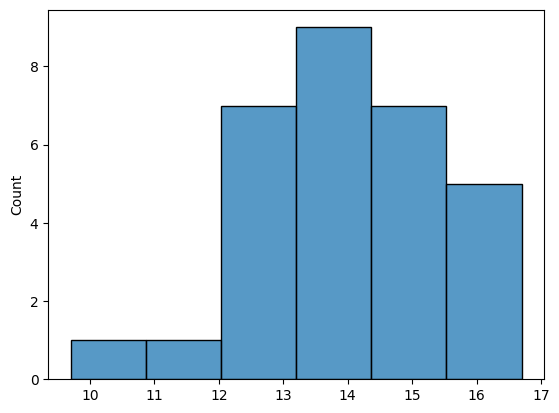

In [9]:
# Take random samples from data (n=30)
import random
random.seed(42)
sample1 = random.sample(data, 30)
sns.histplot(sample1)
plt.show()

Compute the statistic and check *p-value*

In [10]:
# perform one sample t-test. 
# H0: The population mean is 40
stat, p = sts.ttest_1samp(a=sample1, popmean=40)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

t-stat=-93.879, p-value=0.000


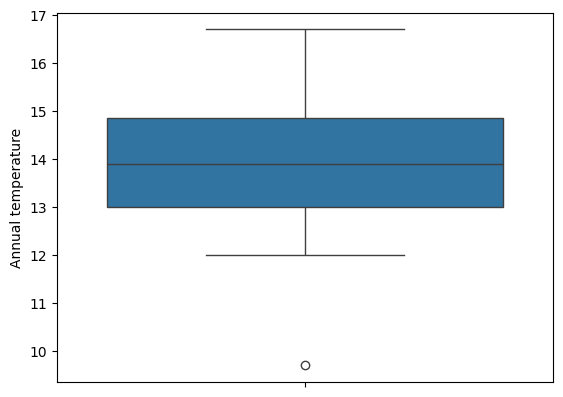

In [11]:
sns.boxplot(y=sample1)
plt.ylabel('Annual temperature')
plt.title("")
plt.show()

Mean of original data: 14.020000000000003
Standard deviation of original data: 1.4902796158215856
Mean of standardized data: -2.135328950695718e-15
Standard deviation of standardized data: 1.0
95% Confidence Interval for standardized data: (-1.9599639845400563, 1.9599639845400518)


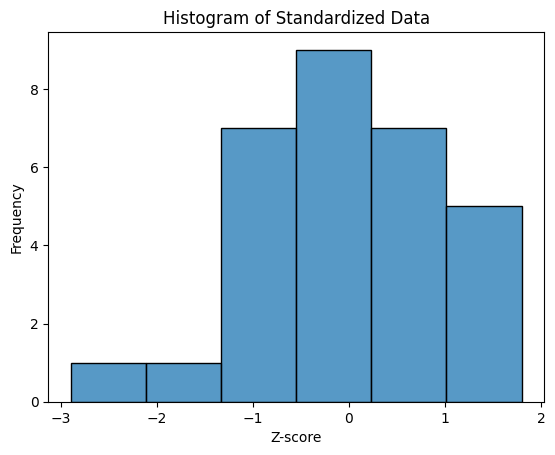

In [12]:
import numpy as np
import scipy.stats as stats

# Calculamos la media y la desviación estándar original
mean_original = np.mean(sample1)
std_original = np.std(sample1)

# Estandarizamos los datos utilizando la puntuación Z (Z-score)
sample1_zscore = (sample1 - mean_original) / std_original

# Calculamos la nueva media y la nueva desviación estándar de los datos estandarizados
mean_new = np.mean(sample1_zscore)
std_new = np.std(sample1_zscore)

# Calculamos el intervalo de confianza del 95% para los datos estandarizados
ci_95 = stats.norm.interval(0.95, loc=mean_new, scale=std_new)

print("Mean of original data:", mean_original)
print("Standard deviation of original data:", std_original)
print("Mean of standardized data:", mean_new)
print("Standard deviation of standardized data:", std_new)
print("95% Confidence Interval for standardized data:", ci_95)

# Visualizamos el histograma de los datos estandarizados
sns.histplot(sample1_zscore)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Data')
plt.show()


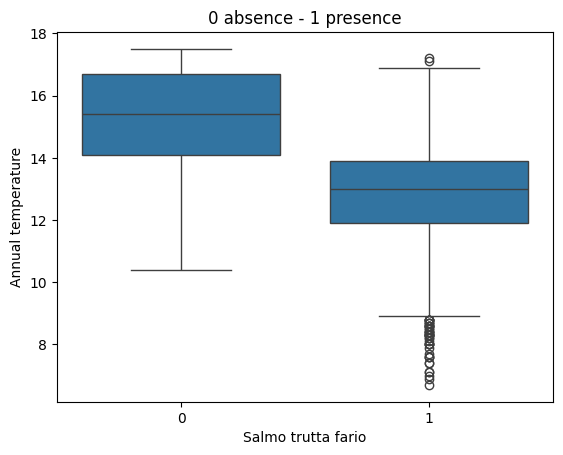

In [17]:
sns.boxplot(x="Salmo trutta fario", y="temp_ann", data=df2)
plt.ylabel('Annual temperature')
plt.title("0 absence - 1 presence")
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

# Calculamos la media y la desviación estándar original
mean_original = np.mean(sample1)
std_original = np.std(sample1)

# Estandarizamos los datos utilizando la puntuación Z (Z-score)
sample1_zscore = (sample1 - mean_original) / std_original

# Calculamos la nueva media y la nueva desviación estándar de los datos estandarizados
mean_new = np.mean(sample1_zscore)
std_new = np.std(sample1_zscore)

# Calculamos el intervalo de confianza del 95% para los datos estandarizados
ci_95 = stats.norm.interval(0.95, loc=mean_new, scale=std_new)

print("Mean of original data:", mean_original)
print("Standard deviation of original data:", std_original)
print("Mean of standardized data:", mean_new)
print("Standard deviation of standardized data:", std_new)
print("95% Confidence Interval for standardized data:", ci_95)

# Visualizamos el histograma de los datos estandarizados
sns.histplot(sample1_zscore)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Data')
plt.show()

In [26]:
dfsub_0 = df2[(df2['Salmo trutta fario']==0)]
dfsub_1 = df2[(df2['Salmo trutta fario']==1)]
# Tomar muestras aleatorias de tamaño 30 de cada grupo
dfsub_0_sample = random.sample(dfsub_0['temp_ann'].tolist(), 100)
dfsub_1_sample = random.sample(dfsub_1['temp_ann'].tolist(), 100)

# Realizar la prueba t de Student para muestras emparejadas
stat, p = sts.ttest_rel(dfsub_0_sample, dfsub_1_sample)

print('t-stat=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('H0 is not rejected. There is not enough evidence to say that the means are different')
else:
    print('H0 is rejected. There is enough evidence to say that the means are different')

t-stat=10.712, p-value=0.000
H0 is rejected. There is enough evidence to say that the means are different


Mean of original data: 14.020000000000003
Standard deviation of original data: 1.4902796158215856
Mean of standardized data: -2.135328950695718e-15
Standard deviation of standardized data: 1.0
95% Confidence Interval for standardized data: (-1.9599639845400563, 1.9599639845400518)


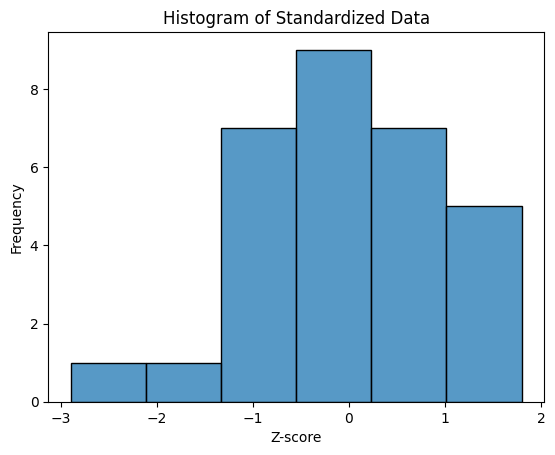

In [30]:
import numpy as np
import scipy.stats as stats

# Calculamos la media y la desviación estándar original
mean_original = np.mean(sample1)
std_original = np.std(sample1)

# Estandarizamos los datos utilizando la puntuación Z (Z-score)
sample1_zscore = (sample1 - mean_original) / std_original

# Calculamos la nueva media y la nueva desviación estándar de los datos estandarizados
mean_new = np.mean(sample1_zscore)
std_new = np.std(sample1_zscore)

# Calculamos el intervalo de confianza del 95% para los datos estandarizados
ci_95 = stats.norm.interval(0.95, loc=mean_new, scale=std_new)

print("Mean of original data:", mean_original)
print("Standard deviation of original data:", std_original)
print("Mean of standardized data:", mean_new)
print("Standard deviation of standardized data:", std_new)
print("95% Confidence Interval for standardized data:", ci_95)

# Visualizamos el histograma de los datos estandarizados
sns.histplot(sample1_zscore)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Data')
plt.show()


In [29]:
from scipy.stats import ttest_ind, mannwhitneyu

# Obtener los subconjuntos de datos para presencia y ausencia de Salmo trutta fario
presence_sites = df2[df2['Salmo trutta fario'] == 1]['temp_ann']
absence_sites = df2[df2['Salmo trutta fario'] == 0]['temp_ann']


# Estandarizar los datos
presence_sites_std = (presence_sites - np.mean(presence_sites)) / np.std(presence_sites)
absence_sites_std = (absence_sites - np.mean(absence_sites)) / np.std(absence_sites)

# Homogeneity of variances
# Leven's test - tests the null hypothesis that the population variances are equal
stat, p = sts.levene(presence_sites_std, absence_sites_std, center='median')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=7.588, p=0.006
reject H0 with an error probability <0.05)


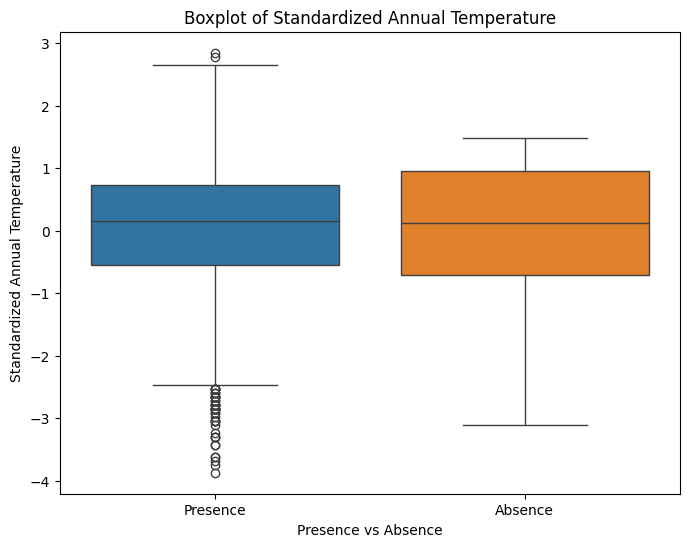

In [31]:
# Crear un DataFrame para los datos estandarizados
data_std = pd.DataFrame({'Presence': presence_sites_std, 'Absence': absence_sites_std})

# Crear un diagrama de caja para los datos estandarizados
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_std)
plt.xlabel('Presence vs Absence')
plt.ylabel('Standardized Annual Temperature')
plt.title('Boxplot of Standardized Annual Temperature')
plt.show()

In [ ]:
sns.boxplot(x="Salmo trutta fario", y="temp_ann", data=df2)
plt.ylabel('Annual temperature')
plt.title("0 absence - 1 presence")
plt.show()

### Section 3

In [32]:
import pandas as pd

# Crear la tabla de frecuencia cruzada
catchment_count = pd.crosstab(index=df2['Catchment_name'], columns='count')

# Ordenar el DataFrame por la columna 'count' en orden descendente
catchment_count_sorted = catchment_count.sort_values(by='count', ascending=False)

# Mostrar el DataFrame ordenado
print(catchment_count_sorted)

# R/: The catchment with more values are Galiza-Norte, Minho, Cantabrica, Duro.

col_0                  count
Catchment_name              
Galiza-Norte             702
Minho                    699
Cantabrica               345
Douro                    272
Tejo                     235
Guadia                   102
Galiza-Sul                95
Mondego                   86
Ebro                      61
Vouga                     56
Tevere                    45
Odelouca                  40
Oeste                     33
Algarve-barlavento        10
Sado                       9
Algarve-Sotavento          6
Mira                       5
Campania-South             5
Jucar                      4
Segura                     2
Sur                        2
EntreDouroeVouga           2
Catala                     2
Guadalquivir               1
Saline-Pescara-Sangro      1
Tejo-Sado                  1
Vouga-Mondego              1


In [35]:
# Filtrar el DataFrame para incluir solo los ocho catchments más muestreados
top_eight_catchments = catchment_count_sorted.head(8).index.tolist()
df_top_eight = df2[df2['Catchment_name'].isin(top_eight_catchments)]

df_top_eight.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
from scipy.stats import f_oneway

# Realizar ANOVA de una vía
stat, p = f_oneway(*[df_top_eight[df_top_eight['Catchment_name'] == catchment]['Elevation_mean_catch'] for catchment in top_eight_catchments])

print('F-statistics=%.3f, p=%.6f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('No se rechaza H0. No hay suficiente evidencia para decir que las medias son diferentes.')
else:
    print('Se rechaza H0. Hay suficiente evidencia para decir que al menos una de las medias es diferente.')


F-statistics=157.174, p=0.000000
Se rechaza H0. Hay suficiente evidencia para decir que al menos una de las medias es diferente.


In [38]:
# perform Tukey's test using the df dataframe defined above)
tukey = stm.multicomp.pairwise_tukeyhsd(df_top_eight['Elevation_mean_catch'], df_top_eight['Catchment_name'])
#display results
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica        Douro   113.406 0.0002   37.6078  189.2042   True
  Cantabrica Galiza-Norte -219.0555    0.0 -280.5173 -157.5936   True
  Cantabrica   Galiza-Sul   32.9023 0.9841   -75.407  141.2115  False
  Cantabrica       Guadia -330.6163    0.0 -435.9711 -225.2614   True
  Cantabrica        Minho  258.0052    0.0  196.4999  319.5105   True
  Cantabrica      Mondego  -40.3519 0.9597 -153.0173   72.3134  False
  Cantabrica         Tejo -202.1506    0.0  -281.215 -123.0862   True
       Douro Galiza-Norte -332.4615    0.0 -399.2247 -265.6983   True
       Douro   Galiza-Sul  -80.5038 0.3568 -191.9068   30.8993  False
       Douro       Guadia -444.0223    0.0 -552.5552 -335.4893   True
       Douro        Minho  144.5992    0.0    77.796  211.4023   True
       Douro      Mo

Well, some limitations or disadvantages can start from the standardization process, this step can make more complicated the intepretability of the results, since it alters or modifies the original units. And even amplify the effect of extreme values.

In the case of ANOVA, it may be the case of interpreting multiple interactions between different factors or variables to be compared. 